In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import torch
from torch import nn

In [3]:
torch.manual_seed(2021)
device = torch.device("mps")

## Gradient Descent Algorithm
Since the goal of most learning algorithms is minimizing the risk (also known as the cost or loss) function, optimization is often the core of most machine learning techniques! 

The gradient descent algorithm, along with its variations such as stochastic gradient descent, is one of the most powerful and popular optimization methods used for deep learning.

Before introducing the gradient descent algorithm, let’s review a very important property of gradients. 

The gradient of a function always points in the direction of the steepest ascent. 

The following exercise will help clarify this.

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def ex1_plot(fun_z, fun_dz):
    """
    Plots the function and gradient vectors
    
    Args:
    fun_z: f.__name__
      Function implementing sine function
    fun_dz: f.__name__
      Function implementing sine function as gradient vector
    
    Returns:
    Nothing
    """
    x, y = np.arange(-3, 3.01, 0.02), np.arange(-3, 3.01, 0.02)
    xx, yy = np.meshgrid(x, y, sparse=True)
    zz = fun_z(xx, yy)
    xg, yg = np.arange(-2.5, 2.6, 0.5), np.arange(-2.5, 2.6, 0.5)
    xxg, yyg = np.meshgrid(xg, yg, sparse=True)
    zxg, zyg = fun_dz(xxg, yyg)
    
    plt.figure(figsize=(8, 7))
    plt.title("Gradient vectors point towards steepest ascent")
    contplt = plt.contourf(x, y, zz, levels=20)
    plt.quiver(xxg, yyg, zxg, zyg, scale=50, color='r', )
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(contplt, cax=cax)
    cbar.set_label('$z = h(x, y)$')
    
    plt.show()

### Exercise: Gradient Vector

In [13]:
def fun_z(x, y):
    """
    Implements function sin(x^2 + y^2)
    
    Args:
    x: (float, np.ndarray)
      Variable x
    y: (float, np.ndarray)
      Variable y
    
    Returns:
    z: (float, np.ndarray)
      sin(x^2 + y^2)
    """
    z = np.sin(x**2 + y**2)
    return z


def fun_dz(x, y):
    """
    Implements function sin(x^2 + y^2)
    
    Args:
    x: (float, np.ndarray)
      Variable x
    y: (float, np.ndarray)
      Variable y
    
    Returns:
    Tuple of gradient vector for sin(x^2 + y^2)
    """
    #################################################
    ## Implement the function which returns gradient vector
    ## Complete the partial derivatives dz_dx and dz_dy
    # Complete the function and remove or comment the line below
    # raise NotImplementedError("Gradient function `fun_dz`")
    #################################################
    dz_dx = np.cos(x**2 + y**2) * 2*x
    dz_dy = np.cos(x**2 + y**2) * 2*y
    return (dz_dx, dz_dy)

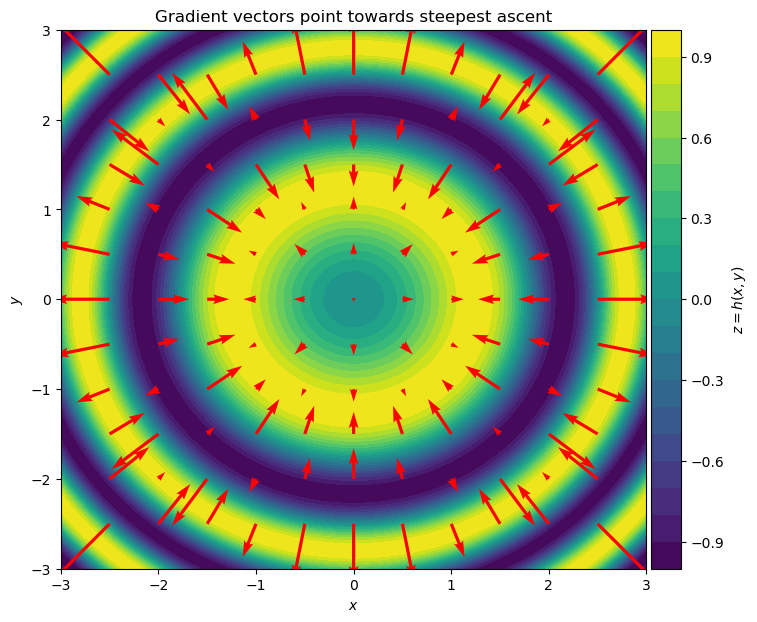

In [14]:
## Uncomment to run
ex1_plot(fun_z, fun_dz)

## Forward Propagation
Everything starts with the forward propagation (pass). PyTorch tracks all the instructions, as we declare the variables and operations, and it builds the graph when we call the `.backward()` pass. PyTorch rebuilds the graph every time we iterate or change it (or simply put, PyTorch uses a dynamic graph).

For gradient descent, it is only required to have the gradients of cost function with respect to the variables we wish to learn. These variables are often called `“learnable / trainable parameters”` or simply `“parameters”` in PyTorch. 

In neural nets, weights and biases are often the learnable parameters.

### Exercise: Buiding a Computational Graph
In PyTorch, to indicate that a certain tensor contains learnable parameters, we can set the optional argument `requires_grad` to `True`. PyTorch will then track every operation using this tensor while configuring the computational graph. For this exercise, use the provided tensors to build the following graph, which implements a single neuron with scalar input and output.

In [37]:
class SimpleGraph:
    """
        Implementing Simple Computational Graph
    """
        
    def __init__(self, w, b):
        """
            Initializing the SimpleGraph
            
            Args:
              w: float
                Initial value for weight
              b: float
                Initial value for bias
            
            Returns:
              Nothing
        """
        assert isinstance(w, float)
        assert isinstance(b, float)
        self.w = torch.tensor([w], requires_grad=True)
        self.b = torch.tensor([b], requires_grad=True)

    def forward(self, x):
        """
            Forward pass
            
            Args:
              x: torch.Tensor
                1D tensor of features
            
            Returns:
              prediction: torch.Tensor
                Model predictions
        """
        assert isinstance(x, torch.Tensor)
        #################################################
        ## Implement the the forward pass to calculate prediction
        ## Note that prediction is not the loss, but the value after `tanh`
        # Complete the function and remove or comment the line below
        # raise NotImplementedError("Forward Pass `forward`")
        #################################################
        prediction = torch.tanh(x * self.w + self.b)
        return prediction

In [38]:
def sq_loss(y_true, y_prediction):
    """
    L2 loss function
    
    Args:
    y_true: torch.Tensor
      1D tensor of target labels
    y_prediction: torch.Tensor
      1D tensor of predictions
    
    Returns:
    loss: torch.Tensor
      L2-loss (squared error)
    """
    assert isinstance(y_true, torch.Tensor)
    assert isinstance(y_prediction, torch.Tensor)
    #################################################
    ## Implement the L2-loss (squred error) given true label and prediction
    # Complete the function and remove or comment the line below
    # raise NotImplementedError("Loss function `sq_loss`")
    #################################################
    loss = (y_true-y_prediction)**2
    return loss


In [39]:
feature = torch.tensor([1])  # Input tensor
target = torch.tensor([7])  # Target tensor

## Uncomment to run
simple_graph = SimpleGraph(-0.5, 0.5)
print(f"initial weight = {simple_graph.w.item()}, "
      f"\ninitial bias = {simple_graph.b.item()}")
prediction = simple_graph.forward(feature)
square_loss = sq_loss(target, prediction)
print(f"for x={feature.item()} and y={target.item()}, "
      f"prediction={prediction.item()}, and L2 Loss = {square_loss.item()}")

initial weight = -0.5, 
initial bias = 0.5
for x=1 and y=7, prediction=0.0, and L2 Loss = 49.0


In [69]:
## Basic linear nn
class SimpleGraph:
    def __init__(self, w, b):
        assert isinstance(w, float)
        assert isinstance(b, float)
        self.w = torch.tensor([w], requires_grad=True)
        self.b = torch.tensor([b], requires_grad=True)

    def forward(self, x):
        assert isinstance(x, torch.Tensor) # torch.Tensor -> int
        # out = wx + b; y = tanh(out)
        prediction = torch.tanh(self.w * x + self.b)
        return prediction

## loss function(mse loss)
def sq_loss(y_true, y_pred):
    assert isinstance(y_true, torch.Tensor)
    assert isinstance(y_pred, torch.Tensor)
    ## mse = (y1-y2)**2
    loss = (y_true-y_pred)**2
    return loss

In [70]:
feature = torch.tensor([1])  # Input tensor
target = torch.tensor([7])  # Target tensor

In [71]:
simple_graph = SimpleGraph(-0.5, 0.5)
print(f"initial weight = {simple_graph.w.item()}, "
      f"\ninitial bias = {simple_graph.b.item()}")

initial weight = -0.5, 
initial bias = 0.5


In [72]:
prediction = simple_graph.forward(feature)
square_loss = sq_loss(target, prediction)
print(f"for x={feature.item()} and y={target.item()}, "
      f"prediction={prediction.item()}, and L2 Loss = {square_loss.item()}")

for x=1 and y=7, prediction=0.0, and L2 Loss = 49.0


## Backward Propagation
In PyTorch, `Tensor` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. 

Each variable has a `grad_fn` attribute that references a function that has created the Tensor (except for Tensors created by the user - these have `None` as `grad_fn`). 

The example below shows that the tensor `c = a + b` is created by the `Add` operation and the gradient function is the object `<AddBackward...>`. Replace `+` with other single operations (e.g., `c = a * b` or `c = torch.sin(a)`) and examine the results.

In [56]:
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([-1.0], requires_grad=True)
print(a)
print(b)

tensor([1.], requires_grad=True)
tensor([-1.], requires_grad=True)


In [57]:
c = a + b
print(c)
print(f"Gradient Function: {c.grad_fn}")

tensor([0.], grad_fn=<AddBackward0>)
Gradient Function: <AddBackward0 object at 0x15ff1b700>


In [58]:
c = a * b
print(c)
print(f"Gradient Function: {c.grad_fn}")

tensor([-1.], grad_fn=<MulBackward0>)
Gradient Function: <MulBackward0 object at 0x15e2a3970>


In [59]:
c = torch.sin(a)
print(c)
print(f"Gradient Function: {c.grad_fn}")

tensor([0.8415], grad_fn=<SinBackward0>)
Gradient Function: <SinBackward0 object at 0x15ff1b700>


For more complex functions, printing the `grad_fn` would only show the last operation, even though the object tracks all the operations up to that point:

In [61]:
print(prediction)
print(f'Gradient function for prediction = {prediction.grad_fn}')

tensor([0.], grad_fn=<TanhBackward0>)
Gradient function for prediction = <TanhBackward0 object at 0x15faa47f0>


In [62]:
print(square_loss)
print(f'Gradient function for loss = {square_loss.grad_fn}')

tensor([49.], grad_fn=<PowBackward0>)
Gradient function for loss = <PowBackward0 object at 0x15fe77dc0>


Now let’s kick off the backward pass to calculate the gradients by calling `.backward()` on the tensor we wish to initiate the backpropagation from. Often, `.backward()` is called on the loss, which is the last node on the graph.

**Important Notes:**

- Learnable parameters (i.e. `requires_grad` tensors) are “contagious”. Let’s look at a simple example: Y = W @ X, where X is the feature tensors and W is the weight tensor (learnable parameters, requires_grad), the newly generated output tensor Y will be also requires_grad. So any operation that is applied to Y will be part of the computational graph. Therefore, if we need to plot or store a tensor that is requires_grad, we must first `.detach()` it from the graph by calling the .detach() method on that tensor.

- `.backward()` accumulates gradients in the leaf nodes (i.e., the input nodes to the node of interest). We can call `.zero_grad()` on the `loss or optimizer` to zero out all `.grad` attributes.

- Recall that in python we can access variables and associated methods with `.method_name`. You can use the command `dir(my_object)` to observe all variables and associated methods to your object, e.g., `dir(simple_graph.w)`.

In [65]:
# dir(simple_graph.w)

In [73]:
# Analytical gradients (Remember detaching)
ana_dloss_dw = - 2 * feature * (target - prediction.detach())*(1 - prediction.detach()**2)
ana_dloss_db = - 2 * (target - prediction.detach())*(1 - prediction.detach()**2)

In [74]:
square_loss.backward()  # First we should call the backward to build the graph

In [75]:
autograd_dloss_dw = simple_graph.w.grad  # We calculate the derivative w.r.t weights
autograd_dloss_db = simple_graph.b.grad  # We calculate the derivative w.r.t bias

In [76]:
print(ana_dloss_dw == autograd_dloss_dw)
print(ana_dloss_db == autograd_dloss_db)

tensor([True])
tensor([True])


## PyTorch nn module
PyTorch provides us with ready-to-use neural network building blocks, such as layers (e.g., linear, recurrent, etc.), different activation and loss functions, and much more, packed in the torch.nn module. If we build a neural network using torch.nn layers, the weights and biases are already in requires_grad mode and will be registered as model parameters.

For training, we need three things:

- Model parameters: Model parameters refer to all the `learnable parameters` of the model, which are accessible by calling `.parameters()` on the model. **Please note that NOT all the requires_grad tensors are seen as model parameters.** To create a custom model parameter, we can use `nn.Parameter` (A kind of Tensor that is to be considered a module parameter).

- Loss function: The loss that we are going to be optimizing, which is often combined with regularization terms.

- Optimizer: PyTorch provides us with many optimization methods (different versions of gradient descent). Optimizer holds the current state of the model and by calling the `step()` method, will update the parameters based on the computed gradients.

### Training loop in PyTorch
We use a regression problem to study the training loop in PyTorch.

The task is to train a wide nonlinear (using tanh activation function) neural net for a simple `sin` regression task. Wide neural networks are thought to be really good at generalization.

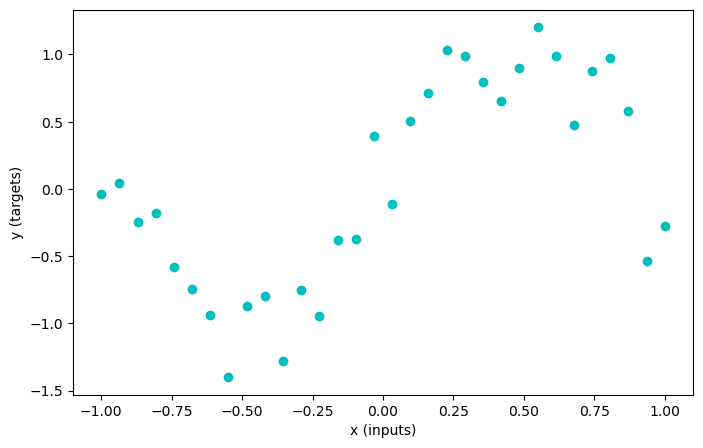

In [77]:
## Generate the sample dataset
# @markdown #### Generate the sample dataset
n_samples = 32
inputs = torch.linspace(-1.0, 1.0, n_samples).reshape(n_samples, 1)
noise = torch.randn(n_samples, 1) / 4
targets = torch.sin(pi * inputs) + noise
plt.figure(figsize=(8, 5))
plt.scatter(inputs, targets, c='c')
plt.xlabel('x (inputs)')
plt.ylabel('y (targets)')
plt.show()

Let’s define a very wide (512 neurons) neural net with one hidden layer and nn.Tanh() activation function.

In [83]:
class WideNet(nn.Module):
  """
   A Wide neural network with a single hidden layer
   Structure is as follows:
   nn.Sequential(
        nn.Linear(1, n_cells) + nn.Tanh(), # Fully connected layer with tanh activation
        nn.Linear(n_cells, 1) # Final fully connected layer
    )
  """

  def __init__(self):
    """
    Initializing the parameters of WideNet

    Args:
      None

    Returns:
      Nothing
    """
    n_cells = 512
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, n_cells),
        nn.Tanh(),
        nn.Linear(n_cells, 1),
    )

  def forward(self, x):
    """
    Forward pass of WideNet

    Args:
      x: torch.Tensor
        2D tensor of features

    Returns:
      Torch tensor of model predictions
    """
    return self.layers(x)

In [84]:
wide_net = WideNet()
print(wide_net)

WideNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [85]:
# Create a mse loss function
loss_function = nn.MSELoss()

# Stochstic Gradient Descent optimizer (you will learn about momentum soon)
lr = 0.003  # Learning rate
sgd_optimizer = torch.optim.SGD(wide_net.parameters(), lr=lr, momentum=0.9)

The training process in PyTorch is interactive - you can perform training iterations as you wish and inspect the results after each iteration.

Let’s perform one training iteration. You can run the cell multiple times and see how the parameters are being updated and the loss is reducing. This code block is the core of everything to come.

In [89]:
# inputs
# targets

In [90]:
# Reset all gradients to zero
sgd_optimizer.zero_grad()

# Forward pass (Compute the output of the model on the features (inputs))
prediction = wide_net(inputs)

# Compute the loss
loss = loss_function(prediction, targets)
print(f'Loss: {loss.item()}')

# Perform backpropagation to build the graph and compute the gradients
loss.backward()

# Optimizer takes a tiny step in the steepest direction (negative of gradient)
# and "updates" the weights and biases of the network
sgd_optimizer.step()

Loss: 0.9685719013214111


In [91]:
def ex3_plot(model, x, y, ep, lss):
  """
  Plot training loss

  Args:
    model: nn.module
      Model implementing regression
    x: np.ndarray
      Training Data
    y: np.ndarray
      Targets
    ep: int
      Number of epochs
    lss: function
      Loss function

  Returns:
    Nothing
  """
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.set_title("Regression")
  ax1.plot(x, model(x).detach().numpy(), color='r', label='prediction')
  ax1.scatter(x, y, c='c', label='targets')
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.legend()

  ax2.set_title("Training loss")
  ax2.plot(np.linspace(1, epochs, epochs), losses, color='y')
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("MSE")

  plt.show()

## Exercise: Training Loop
Using everything we’ve learned so far, we ask you to complete the train function below.

In [92]:
def train(features, labels, model, loss_fun, optimizer, n_epochs):
  """
  Training function

  Args:
    features: torch.Tensor
      Features (input) with shape torch.Size([n_samples, 1])
    labels: torch.Tensor
      Labels (targets) with shape torch.Size([n_samples, 1])
    model: torch nn.Module
      The neural network
    loss_fun: function
      Loss function
    optimizer: function
      Optimizer
    n_epochs: int
      Number of training iterations

  Returns:
    loss_record: list
      Record (evolution) of training losses
  """
  loss_record = []  # Keeping recods of loss

  for i in range(n_epochs):
    #################################################
    ## Implement the missing parts of the training loop
    # Complete the function and remove or comment the line below
    # raise NotImplementedError("Training loop `train`")
    #################################################
    optimizer.zero_grad()  # Set gradients to 0
    predictions = model(features)  # Compute model prediction (output)
    loss = loss_fun(labels,predictions)  # Compute the loss
    loss.backward() # Compute gradients (backward pass)
    optimizer.step()  # Update parameters (optimizer takes a step)

    loss_record.append(loss.item())
  return loss_record

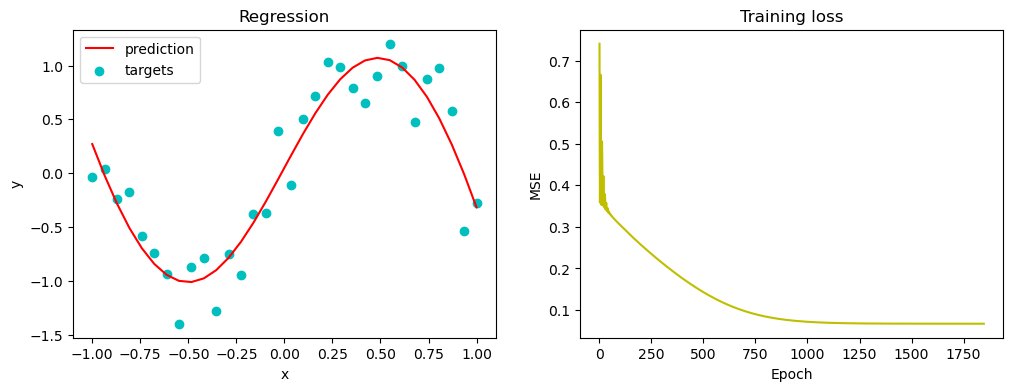

In [94]:
epochs = 1847 # Cauchy, Exercices d'analyse et de physique mathematique (1847)
## Uncomment to run
losses = train(inputs, targets, wide_net, loss_function, sgd_optimizer, epochs)
ex3_plot(wide_net, inputs, targets, epochs, losses)